<a href="https://colab.research.google.com/github/pythonuzgit/elmurodov/blob/master/Image%20Classification%20with%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the necessary packages

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imshow

from skimage.io import imread
from skimage.transform import resize

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from keras import layers
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout

from keras.models import Model
import keras.backend as K 
from keras.models import Sequential

Load data from the directory

In [10]:
filenames = os.listdir('/content/images')

filenames

['nature flowers', 'nature tree', 'nature mushrooms']

In [11]:
filenames = os.listdir('/content/images')

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['nature flowers', 'nature mushrooms', 'nature tree']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  #print(class_num)
  path = os.path.join(DATADIR, category)
  #print(path)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path, img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    #break
    img_resized = resize(img_array, (150, 150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)




flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)





In [12]:
flat_data[0]

array([0.03270118, 0.02791686, 0.01223059, ..., 0.74565176, 0.7105098 ,
       0.65168627])

In [13]:
len(flat_data[0])

67500

In [15]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

See the total omages and in each category

<BarContainer object of 3 artists>

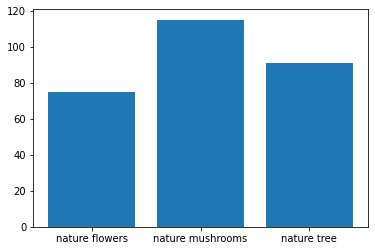

In [16]:
unique, count = np.unique(target, return_counts = True)
plt.bar(CATEGORIES, count)

Split data into Training and testing

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size = 0.3, random_state = 109)

Create a Support-vectormachine model

In [19]:
from sklearn.model_selection import GridSearchCV

from sklearn import svm

param_grid = [
              {'C' : [1, 10, 100, 1000], 'kernel' :['linear']},
              {'C' : [1, 10, 100, 1000], 'gamma' :[0.001, 0.0001], 'kernel':['rbf']},
              ]

SVC = svm.SVC(probability = True)
clf = GridSearchCV(SVC, param_grid)
clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
y_pred = clf.predict(x_test)
y_pred

array([2, 1, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 2, 0, 2, 1, 1, 2, 0, 1, 0, 2,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 1, 2, 2, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 2, 2, 1, 2, 2, 0,
       2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 0, 2, 2, 2])

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
accuracy_score(y_pred, y_test)

0.49411764705882355

In [26]:
confusion_matrix(y_pred, y_test)

array([[15,  2,  7],
       [ 9, 15,  8],
       [ 5, 12, 12]])